# 1.0 Install & Import Dependencies

In [1]:
#!pip install pandas --quiet
#!pip install openpyxl --quiet
#!pip install plotly-express --quiet
#!pip install xlwings --quiet

In [15]:
from pathlib import Path # Python standard library
from datetime import datetime

import pandas as pd
import plotly.express as px
import xlwings as news

In [16]:
# [OPTIONAL] SETTING
import plotly.io as pio
pio.templates.default ='plotly_white'

# 1.1 Get From Excel

In [17]:
# Read excel file (facebook.xlsx) into a pandas
excel_path = Path.cwd() / "data" / "facebook.xlsx"
df = pd.read_excel(excel_path, sheet_name="facebook", skiprows=2)

In [18]:
# Check the data 
df.sample()

,Date,Gender,Service,Age,Location,Likes,Share,Comments,Engagements,Text
236,2022-01-05T11:37:03.362Z,Male,Mushaax,17,Borama,3987,504,660,356,"Telesom you have dedicated network coverage, w..."


In [19]:
# print a concise summary of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          468 non-null    object
 1   Gender        468 non-null    object
 2   Service       468 non-null    object
 3   Age           468 non-null    int64 
 4   Location      468 non-null    object
 5   Likes         468 non-null    int64 
 6   Share         468 non-null    int64 
 7   Comments      468 non-null    int64 
 8   Engagements   468 non-null    int64 
 9   Text          468 non-null    object
dtypes: int64(5), object(5)
memory usage: 36.7+ KB


In [20]:
df['Month'] =pd.to_datetime(df['Date'], format="%Y/%m/%d %H:%M:%S%").dt.month
df['Year'] =pd.to_datetime(df['Date'], format="%Y/%m/%d %H:%M:%S%").dt.year
df['Time'] =pd.to_datetime(df['Date'], format="%Y/%m/%d %H:%M:%S%").dt.time
df.head(5)

,Date,Gender,Service,Age,Location,Likes,Share,Comments,Engagements,Text,Month,Year,Time
0,2021-12-30T19:56:11.995Z,Female,Kaafiye,34,Gabiley,1200,700,200,5600,Telesom is the leading Telecom in Somaliland,12,2021,19:56:11.995000
1,2021-12-31T17:16:01.168Z,Female,Waafi,43,Berbera,2500,900,250,7500,"Telesom innovate new service, I like your serv...",12,2021,17:16:01.168000
2,2021-12-30T16:47:34.685Z,Female,Internet,32,Ceerigabo,850,150,100,3300,"Telesom you have dedicated network coverage, w...",12,2021,16:47:34.685000
3,2021-12-31T00:07:54.511Z,Male,Aqoonmaal,17,Gabiley,920,220,300,4500,Telesom are always telecom pioneers,12,2021,00:07:54.511000
4,2021-12-30T15:52:30.802Z,Male,Mushaax,27,Oodweyne,2820,3553,2906,1746,"Telesom you have dedicated network coverage, w...",12,2021,15:52:30.802000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          468 non-null    object
 1   Gender        468 non-null    object
 2   Service       468 non-null    object
 3   Age           468 non-null    int64 
 4   Location      468 non-null    object
 5   Likes         468 non-null    int64 
 6   Share         468 non-null    int64 
 7   Comments      468 non-null    int64 
 8   Engagements   468 non-null    int64 
 9   Text          468 non-null    object
 10  Month         468 non-null    int64 
 11  Year          468 non-null    int64 
 12  Time          468 non-null    object
dtypes: int64(7), object(6)
memory usage: 47.7+ KB


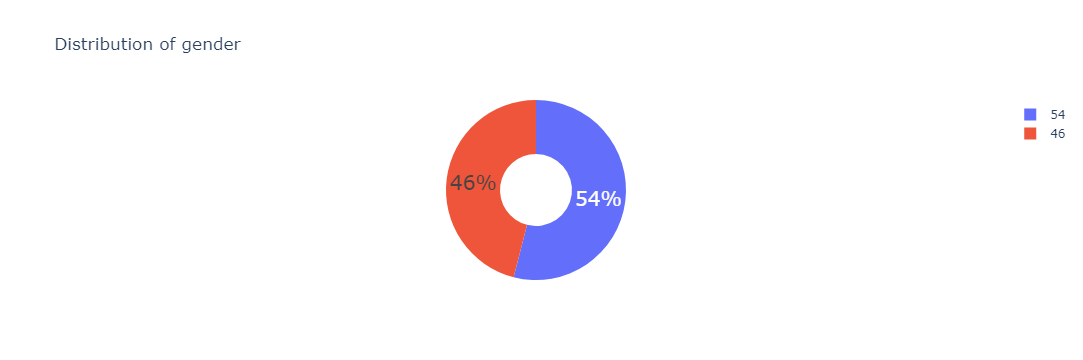

In [23]:
gender_dis = round(df['Gender'].value_counts(normalize=True)*100)
fig_gender = px.pie(gender_dis, values='Gender', names='Gender', title='Distribution of gender', hole=0.4)
fig_gender.update_traces(
                   title_font = dict(size=60,family='Verdana', 
                                     color='darkred'),
                   hoverinfo='label+percent',
                    #label='Male','Female'
                   textinfo='percent', textfont_size=20)
fig_gender.show()

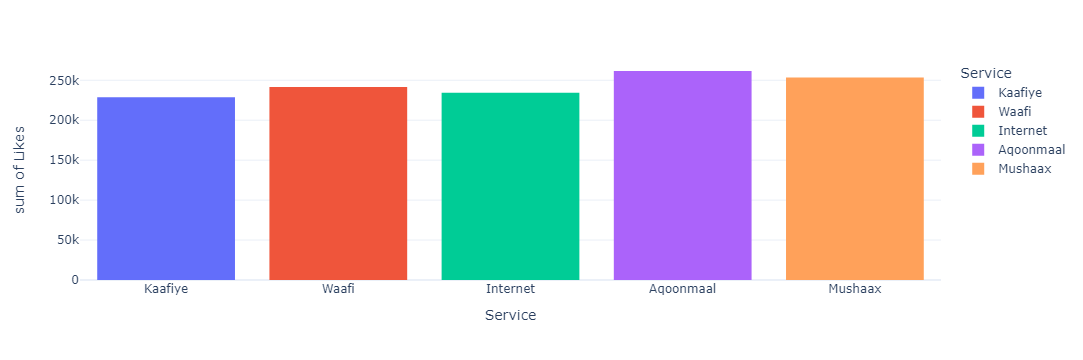

In [24]:
fig_services = px.histogram(df, x='Service', y='Likes', color='Service')
fig_services.show()

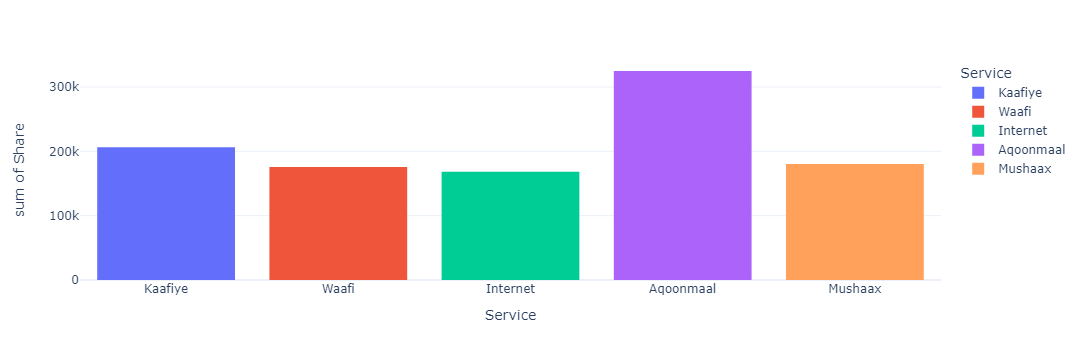

In [25]:
fig_shares = px.histogram(df, x='Service', y='Share', color='Service') #color_discrete_sequence=px.colors.sequential.RdBu)
fig_shares.show()

In [72]:
df.head(5)

,Date,Gender,Service,Age,Location,Likes,Share,Comments,Engagements,Text,Month
0,2021-12-30T19:56:11.995Z,Female,Kaafiye,34,Gabiley,1200,700,200,5600,Telesom is the leading Telecom in Somaliland,12
1,2021-12-31T17:16:01.168Z,Female,Waafi,43,Berbera,2500,900,250,7500,"Telesom innovate new service, I like your serv...",12
2,2021-12-30T16:47:34.685Z,Female,Internet,32,Ceerigabo,850,150,100,3300,"Telesom you have dedicated network coverage, w...",12
3,2021-12-31T00:07:54.511Z,Male,Aqoonmaal,17,Gabiley,920,220,300,4500,Telesom are always telecom pioneers,12
4,2021-12-30T15:52:30.802Z,Male,Mushaax,27,Oodweyne,2820,3553,2906,1746,"Telesom you have dedicated network coverage, w...",12


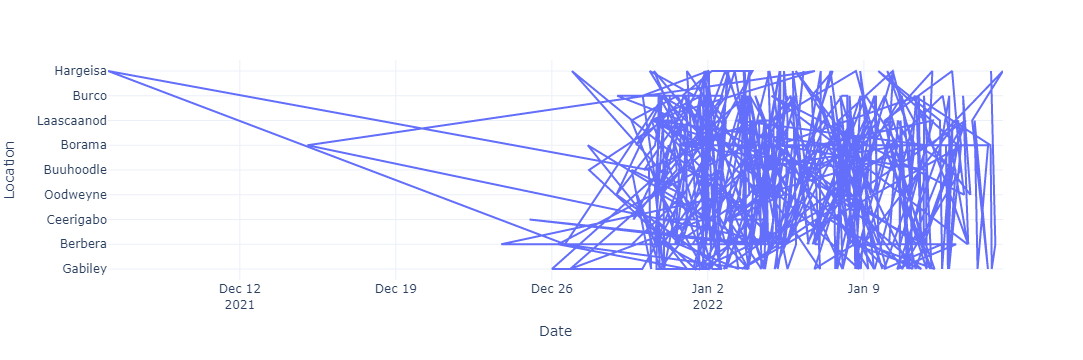

In [26]:
fig_date = px.line(df, x='Date', y='Location')
fig_date.show()

In [27]:
# Group Numeric Value by sub-category
grouped_by_location = df.groupby(by="Location").sum()[['Share']]
grouped_by_location

C:\Users\Admin\AppData\Local\Temp\ipykernel_10056\4112667137.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Share
Location,
Berbera,143742
Borama,209988
Burco,88964
Buuhoodle,65012
Ceerigabo,44047
Gabiley,122407
Hargeisa,104596
Laascaanod,167709
Oodweyne,108939


In [28]:
grouped_by_location = df.groupby(by="Location").sum()[['Share']].sort_values(by='Likes')
grouped_by_location

C:\Users\Admin\AppData\Local\Temp\ipykernel_10056\61162744.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



KeyError: 'Likes'

# Plot Data

## Analysis Sub-Category

In [ ]:
location_bar = px.bar(
    grouped_by_location,
    x='Likes',
    y='Likes',
    color='Likes',
    color_continuous_scale=['red', 'yellow', 'green'],
    title='<b>Location & Likes by Location</b>'
)
location_bar.show()

# Likes by Services 

In [29]:
df.groupby(by=['Service']).sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10056\3455477912.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age,Likes,Share,Comments,Engagements,Month,Year
Service,,,,,,,
Aqoonmaal,3232,261638,324855,271923,279552,290,230492
Internet,3087,234486,168069,175511,225124,258,188031
Kaafiye,2505,228870,206352,161514,224721,251,173877
Mushaax,2762,253459,180348,223626,223929,300,183983
Waafi,2596,241600,175780,188328,148235,293,169829


In [30]:
df.groupby(by=['Service']).sum()[['Likes']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_10056\2290613399.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Likes
Service,
Aqoonmaal,261638
Internet,234486
Kaafiye,228870
Mushaax,253459
Waafi,241600


In [31]:
df.groupby(by=['Service']).sum()[['Likes']].sort_values(by='Likes')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10056\2746607525.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Likes
Service,
Kaafiye,228870
Internet,234486
Waafi,241600
Mushaax,253459
Aqoonmaal,261638
